**Google Colab에 우리가 분석하고자 하는 데이터를 올리기 위해서 **


```
from google.colab import files
files.upload()
```
를 하게 되면 우리가 올리고자하는 파일을 선택후 upload하여 분석과 학습이 가능하다.


In [7]:
import pandas as pd
df = pd.read_csv("C:/Case.csv")
df

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766
...,...,...,...,...,...,...,...,...
73,74,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
74,75,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
75,76,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
76,77,Gyeongsangnam-do,-,False,etc,22,-,-


이 데이터는 우리나라의 코로나 바이러스의 최근 동향을 나타내는 데이터인데, 여기서 보면 collumn이 그렇게 많지는 않다. 지역, 도시, 단체 감염 여부, 세부 장소, 감염 확진 인원, latitude, longtitude이다.

여기서 딥러닝 알고리즘을 이용해서 모델을 만드려고 할때에는 무언가 예측할 부분이 필요한데, '발생 인원수에 따른 발생 도시 예측'이나 '발생 인원수에 따른 집잔 감염 여부'를 우선 주제로 생각 중인데, 후자는 별로 의미가 없을것 같기도 하다. 이미 선형 회귀일것 같기 때문에.

따라서 선형 관계를 파악하기 위해서 시각화를 해보고자 한다.

In [8]:
from sklearn.preprocessing import OrdinalEncoder
group_cat = df[['group']]
ordinal_encoder = OrdinalEncoder()
group_cat_encoded = ordinal_encoder.fit_transform(group_cat)
df['group'] = group_cat_encoded
province_cat_encoded = ordinal_encoder.fit_transform(df[['province']])
df['province'] = province_cat_encoded

어차피 dataframe은 dictionary의 형태이기 때문에 언제든지 key와 value의 값이 추가, 삭제, 변경 등이 모드 python의 사전형 자료를 다루는 것 처럼 가능하다.

데이터셋과 테스트셋을 sklearn의 함수를 이용해서 만들어보자

test_set의 크기는 전체의 20%이고 train_set의 크기는 전체의 80%가 되도록 만들었다.

cf.DataFrame을 다룰 때에는 pandas의 library를 이용해야 한다.

In [9]:
print(max(df['confirmed']))
df['group']

4126


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
73    1.0
74    1.0
75    1.0
76    0.0
77    0.0
Name: group, Length: 78, dtype: float64

실제로 df['confirmed']의 최댓값을 살펴보니 4511이라는 값이었고, 왜 아래와 같이 산점도가 만들어졌는지 알 수 있었다. 그래서 선형관계를 어떻게 파악하면 좋을지 생각 중이다.

In [10]:
df['province'].value_counts()

8.0     9
15.0    8
9.0     7
0.0     7
7.0     6
10.0    5
1.0     4
12.0    4
14.0    4
3.0     4
13.0    4
2.0     3
5.0     3
16.0    3
4.0     3
6.0     3
11.0    1
Name: province, dtype: int64

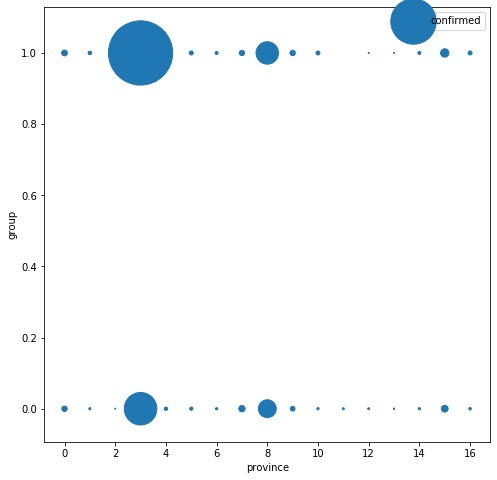

In [11]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter',x ='province', y = 'group', s = df['confirmed'], label = 'confirmed',figsize = (8,8))
plt.legend()

In [12]:
df.describe()
#밑에 모든 자료가 나오지 않는 이유는 숫자형 자료만 정보가 나오기 때문이다.

,case_id,province,group,confirmed
count,78.000000,78.000000,78.000000,78.000000
mean,39.500000,8.064103,0.602564,99.282051
std,22.660538,4.931583,0.492535,486.741428
min,1.000000,0.000000,0.000000,1.000000
25%,20.250000,4.000000,0.000000,3.000000
50%,39.500000,8.000000,1.000000,8.000000
75%,58.750000,12.000000,1.000000,16.750000
max,78.000000,16.000000,1.000000,4126.000000


df.info()를 보면 모든 정보가 174개의 non-null 값을 가지기 때문에 그 부분은 건드릴 필요가 없다. 다만 만약에 사용하려 한다면 city의 값이나 infection_case등을 수정해 주어야 하는 것은 맞다.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_id         78 non-null     int64  
 1   province        78 non-null     float64
 2   city            78 non-null     object 
 3   group           78 non-null     float64
 4   infection_case  78 non-null     object 
 5   confirmed       78 non-null     int64  
 6   latitude        78 non-null     object 
 7   longitude       78 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ KB


위에 데이터의 information에서 보면 알 수 있겠지만 자료형이 숫자형 자료int64와 float64이외에도 object라는 문자열 자료형이 존재하는데, 이를 sklearn.preprocessing의 OrdinalEncoder을 이용해서 바꾸거나 아니면 어차피 나중에 범위를 0~1로 줄이는 경우가 일반적이기 때문에 그렇게 OneHotEncoder을 이용해서 바꿔주어도 좋다.

In [14]:
df['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       14
contact with patient                      8
overseas inflow                           6
Cheongdo Daenam Hospital                  3
Guro-gu Call Center                       3
gym                                       2
Onchun Church                             2
Suyeong-gu Kindergarten                   1
Pilgrimage to Israel                      1
Seosan-si Laboratory                      1
Bonghwa Pureun Nursing Home               1
Geochang Church                           1
Jung-gu Fashion Company                   1
Gyeongsan Jeil Silver Town                1
Goesan-gun Jangyeon-myeon                 1
Changnyeong Coin Karaoke                  1
Seongdong-gu APT                          1
Gyeongsan Cham Joeun Community Center     1
Dongan Church                             1
Geochang-gun Woongyang-myeon              1
Milal Shelter                             1
Ministry of Oceans and Fisheries

먼저 어떤 주제로 데이터를 분석하고 신경망을 모델링 할 것인지 정해야 한다. 이번에는 나머지 정보들을 이용해서 'province'를 예측해보고 싶다. 우선 'infection_case'는 81개의 범주나 있기 때문에 이를 예측하는 것은 사실상 매우 어렵다. 따라서 'province'의 값을 나머지 자료들을 이용해 예측해보고자 한다.

그러기 위해서는 우선 object자료형으로 이루어진 데이터를 모두 float숫자형 자료로 바꾸어 주고 test_set과 train_set로 나누어주는 과정을 거쳐야 한다.

다만 group의 'longitude', 'latitude'값은 필요가 없을 것 같기 떄문에 지워주고 'city'항목의 값을 float로 바꾸고 빈 공간을 채워주고자 한다.

In [15]:
df['infection_case'] = ordinal_encoder.fit_transform(df[['infection_case']])
df['city'] = ordinal_encoder.fit_transform(df[['city']])
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
df = df.drop('latitude', axis = 1)
df = df.drop('longitude', axis = 1)
imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [16]:
df

,case_id,province,city,group,infection_case,confirmed
0,1,15.0,14.0,1.0,9.0,70
1,2,15.0,11.0,1.0,5.0,14
2,3,15.0,21.0,1.0,22.0,13
3,4,15.0,18.0,1.0,16.0,10
4,5,15.0,8.0,1.0,4.0,9
...,...,...,...,...,...,...
73,74,9.0,4.0,1.0,14.0,7
74,75,9.0,3.0,1.0,2.0,7
75,76,9.0,26.0,1.0,20.0,2
76,77,9.0,0.0,0.0,28.0,22


In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 44)

위와 같이 8:2의 비율로 train data와 test data를 나누어 주었다. 즉, 원하는 테스트셋이 마련 된 것이다.

그렇게 데이터셋 자체만 나눈 뒤에 우리가 예측하고자 하는 값인 'province'만 떼어놓고 df_train_labels, 즉 엄밀히 말하면 y값으로 설정했다.

In [18]:
df_train_data = train_set.drop('province', axis = 1)
df_train_labels = train_set['province'].copy()

In [19]:
df_train_data

,case_id,city,group,infection_case,confirmed
24,25,26.0,1.0,24.0,9
25,26,0.0,0.0,30.0,1
76,77,0.0,0.0,28.0,22
15,16,20.0,1.0,24.0,4126
26,27,0.0,0.0,28.0,5
...,...,...,...,...,...
3,4,18.0,1.0,16.0,10
59,60,0.0,0.0,27.0,1
45,46,0.0,0.0,28.0,10
35,36,26.0,1.0,24.0,1


train의 개수는 139개, test는 35개이다

사실 지금까지의 연속된 데이터를 변형하는 등의 과정을 pipeline으로 설정해 놓았다면 계속해서 사용할 수 있어서 장기적으로는 유리하기 때문에 만들어 보고자 한다.

In [20]:
from sklearn.compose import ColumnTransformer

이제 학습을 위한 모델 설정을 해보려고 한다.

1. sklearn.svm의 모델중 하나인 SVR이용
-> 학습법의 하나로, 서포트 벡터 머신 회귀 이다.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
              {'kernel' : ['linear'], 'C': [10,30,100,300]},
              {'kernel' : ['rbf'], 'C': [1,3,10,30,100,300], 'gamma': [0.01,0.03,0.1,0.3,1,3]},
]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv= 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(df_train_data, df_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10, 30, 100, 300], 'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(grid_search.best_params_)
final_model_1 = grid_search.best_estimator_

{'C': 300, 'gamma': 0.01, 'kernel': 'rbf'}


In [25]:
final_model_1

SVR(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

2. sklearn.ensemble의 RandomForestRegressor 이용
-> 마찬가지로 학습법중 하나로, tree구조의 하나인데 ensemble의 방법을 사용해 다양한 범주로 데이터를 나누어서 각 데이터 별로 적합한 모델을 설정하여 모델들을 합쳐서 사용한다.

In [35]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
              {'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features' : [2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(df_train_data, df_train_labels)

C:\newana\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\newana\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\newana\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\newana\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
print(grid_search.best_params_)
final_model_2 = grid_search.best_estimator_
final_model_2

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

테스트셋 생성 마무리하기


In [29]:
df_test_data = test_set.drop('province', axis = 1)
df_test_labels = test_set['province'].copy()

두개의 모델에 대한 적합도와 최적의 모델 찾기

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
final_mse_1 = np.sqrt(mean_squared_error(df_test_labels, final_model_1.predict(df_test_data)))
final_mse_2 = np.sqrt(mean_squared_error(df_test_labels, final_model_2.predict(df_test_data)))

print(final_mse_1, final_mse_2)

4.341591345798684 3.2461515676258865


In [56]:
mape1 = np.mean(np.abs((df_test_labels - final_model_1.predict(df_test_data)) / np.abs(df_test_labels)))
mape2 = np.mean(np.abs((df_test_labels - final_model_2.predict(df_test_data)) / np.abs(df_test_labels)))
accuracy1 = round(100*(1 - mape1), 2)
accuracy2 = round(100*(1 - mape2), 2)

if accuracy1 > accuracy2:print('Best Model: SVR   Accuracy: %s   Loss: %s' %(accuracy1, final_mse_1))
else:print('Best Model: Random Tree   Accuracy: %s   Loss: %s' %(accuracy2, final_mse_2))


Best Model: SVR   Accuracy: 68.51   Loss: 4.341591345798684
